In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

说明：二者本质上都是多层感知器，只不过逻辑回归再输出层又多一次“**映射/转换**”操作而已！
- 线性/非线性回归：给出的结果是“**连续值**”；
- 逻辑回归：给出的结果是“**是/否**”的二选一判断；

逻辑回归的解决思路：不管是现在的“二分类”，还是后面的多分类。思路都是把所有输出层的各个结果，再都“等比映射”到[0,1]范围内，从而当成每种结果的概率（数值是多少，就可看成概率是多少）。映射后的值越大，说明这种可能的概率越大，就选这种即可。

因此：逻辑回归，就是在原多层感知器的基础上，在最后一层再多一个激活函数（sigmoid激活函数）

深度学习网络的本质：一个映射网络（逻辑回归）；一个万能拟合网络（线性/非线性回归）。

---

逻辑回归所用的损失函数：**交叉熵损失函数，不用mse！**。—— 因为交叉熵会把[0,1]范围内的概率值进行放大，区分度更明显！！！

例如一种可能性的概率是0.1，另一种可能的概率是0.6。如果还用mse均方误差的话，那衡量两个误差的值就是：
$$ (1-0.1)^{2} = 0.81 $$
$$ (1-0.6)^{2} = 0.16 $$
虽然也能刻画两者的误差loss，但是这0.81和0.16都还是同一个数量级！区分度很小！很不利于梯度下降。—— 可以用mse，但是训练很慢！

但使用**binary_crossentropy二元交叉熵损失函数**就会把“大的误差”给进一步放大：比如可能性只有0.1的损失值会被放大到100多，而可能性是0.7的损失值可能小于1。这种数值上的跨度就有利于梯度下降。所以：**刻画概率值（[0,1]）类型的loss（多分类同样适用），首选交叉熵类的损失函数，少用mse！**

---

注意区分：
- sigmoid是激活函数，和relu是同类；作用于输出层后；$$ y_{predict} = \frac{1}{1 + e^{-x}} $$
- binary_crossentropy是损失函数（底数是e，也叫**对数几率回归**），和mse是同类；$$ loss = -y_{p}\ln^{y_{r}} - (1-y)\ln^{(1-y_{r})}$$ 
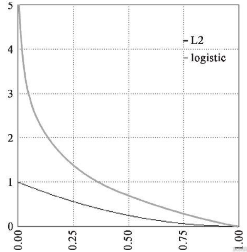

In [2]:
data = pd.read_csv('E:/tensorflow2.0_日月光华/日月光华-tensorflow资料/数据集/credit-a.csv')

In [3]:
data.head()
# 发现没有每列的标题，即第一行就是有效数据！故：可以让pandas加一个默认表头：

,0,30.83,0.1,0.2,0.3,9,0.4,1.25,0.5,0.6,1,1.1,0.7,202,0.8,-1
0,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
1,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
2,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
3,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1
4,0,32.08,4.000,0,0,6,0,2.50,0,1,0,0,0,360,0.0,-1


In [4]:
data = pd.read_csv('E:/tensorflow2.0_日月光华/日月光华-tensorflow资料/数据集/credit-a.csv', header = None)
data.head()
# 特征：[0,14]列，共15个特征；目标值是最后一列

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


In [5]:
# 查看“最后一列”是否为一个2分类问题：是否只有2种值
data.iloc[:,-1].value_counts()

 1    357
-1    296
Name: 15, dtype: int64

In [6]:
# 数据提取：目标值用0和1比较好处理 —— 注：-1和1适合支持向量机。
x = data.iloc[:, :-1]
y = data.iloc[:, -1].replace(-1,0)  # 把所有的-1替换为0！

In [7]:
# 模型搭建：
model = tf.keras.Sequential()

# 第一隐藏层：设定该层有4个神经元（自定义）；输入层有15个特征，即输入数据尺寸为15行/维；激活函数relu激活非线性
model.add( tf.keras.layers.Dense(4, input_shape = (15,), activation = 'relu') )

# 第二隐藏层：同设定有4个神经元，relu激活
model.add( tf.keras.layers.Dense(4, activation = 'relu') )

# 输出层：二分类虽然有两个项，但其实输出一个就够了；还需把结果sigmoid激活/映射到概率（多一步映射）！！
model.add( tf.keras.layers.Dense(1, activation = 'sigmoid') )  # 注意：虽然是2分类，但是这里只能写1！！

In [8]:
model.summary()
# 第一隐藏层参数：(15 + 1) * 4 = 64
# 第二隐藏层参数：(4 + 1) * 4 = 20
# 输出层参数：4 + 1 = 5

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 模型编译/配置：
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']  # 每个epoch再多打印一个正确率（loss已默认有） —— 每次正传都会有一个结果
)

In [11]:
# 模型训练：
history = model.fit( x, y, epochs = 100)

Train on 653 samples
Epoch 1/100
653/653 [==============================] - 0s 524us/sample - loss: 7.5677 - acc: 0.4533
Epoch 2/100
653/653 [==============================] - 0s 37us/sample - loss: 7.0520 - acc: 0.4518
Epoch 3/100
653/653 [==============================] - 0s 47us/sample - loss: 6.1628 - acc: 0.4518
Epoch 4/100
653/653 [==============================] - 0s 44us/sample - loss: 4.8064 - acc: 0.4395
Epoch 5/100
653/653 [==============================] - 0s 47us/sample - loss: 3.0609 - acc: 0.4380
Epoch 6/100
653/653 [==============================] - 0s 44us/sample - loss: 1.3784 - acc: 0.4977
Epoch 7/100
653/653 [==============================] - 0s 47us/sample - loss: 0.7707 - acc: 0.6417
Epoch 8/100
653/653 [==============================] - 0s 49us/sample - loss: 0.7099 - acc: 0.6554
Epoch 9/100
653/653 [==============================] - 0s 46us/sample - loss: 0.7134 - acc: 0.6876
Epoch 10/100
653/653 [==============================] - 0s 49us/sample - loss: 0.6814 -

653/653 [==============================] - 0s 29us/sample - loss: 0.4792 - acc: 0.7917
Epoch 82/100
653/653 [==============================] - 0s 29us/sample - loss: 0.4712 - acc: 0.7963
Epoch 83/100
653/653 [==============================] - 0s 32us/sample - loss: 0.4737 - acc: 0.7979
Epoch 84/100
653/653 [==============================] - 0s 31us/sample - loss: 0.4611 - acc: 0.7979
Epoch 85/100
653/653 [==============================] - 0s 31us/sample - loss: 0.4833 - acc: 0.7948
Epoch 86/100
653/653 [==============================] - 0s 35us/sample - loss: 0.4680 - acc: 0.7933
Epoch 87/100
653/653 [==============================] - 0s 32us/sample - loss: 0.4646 - acc: 0.7963
Epoch 88/100
653/653 [==============================] - 0s 40us/sample - loss: 0.4586 - acc: 0.8086
Epoch 89/100
653/653 [==============================] - 0s 31us/sample - loss: 0.4585 - acc: 0.7917
Epoch 90/100
653/653 [==============================] - 0s 34us/sample - loss: 0.4591 - acc: 0.7948
Epoch 91/100


In [12]:
# 关于训练记录history中的一些东西/属性：
type(history.epoch), type(history.history)

(list, dict)

In [13]:
# 看看history所记录的，训练过程中的一些东西：history.history 是一个“字典”！
history.history.keys() # 就是metrics中的东西

dict_keys(['loss', 'acc'])

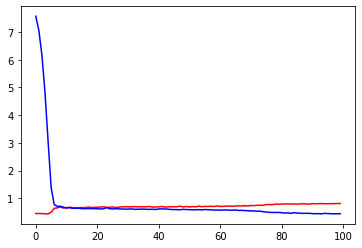

In [16]:
# 那两个“键值对”画出来：
plt.plot(history.epoch, history.history.get('acc'), c = 'r')
plt.plot(history.epoch, history.history.get('loss'), c = 'b')

In [17]:
# 测试：如果loss用mse会怎么样！
model1 = tf.keras.Sequential( [
    tf.keras.layers.Dense(4, input_shape = (15,), activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
] )

In [18]:
model1.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['acc']
)

In [19]:
history1 = model1.fit(x, y, epochs = 100) # 相同epochs下，acc上升没用交叉熵快！

Train on 653 samples
Epoch 1/100
653/653 [==============================] - 0s 102us/sample - loss: 0.5557 - acc: 0.4395
Epoch 2/100
653/653 [==============================] - 0s 35us/sample - loss: 0.5550 - acc: 0.4395
Epoch 3/100
653/653 [==============================] - 0s 52us/sample - loss: 0.5547 - acc: 0.4395
Epoch 4/100
653/653 [==============================] - 0s 37us/sample - loss: 0.5540 - acc: 0.4410
Epoch 5/100
653/653 [==============================] - 0s 58us/sample - loss: 0.5534 - acc: 0.4410
Epoch 6/100
653/653 [==============================] - 0s 53us/sample - loss: 0.5527 - acc: 0.4410
Epoch 7/100
653/653 [==============================] - 0s 37us/sample - loss: 0.5520 - acc: 0.4410
Epoch 8/100
653/653 [==============================] - 0s 52us/sample - loss: 0.5511 - acc: 0.4410
Epoch 9/100
653/653 [==============================] - 0s 52us/sample - loss: 0.5500 - acc: 0.4410
Epoch 10/100
653/653 [==============================] - 0s 37us/sample - loss: 0.5487 -

653/653 [==============================] - 0s 34us/sample - loss: 0.1517 - acc: 0.8132
Epoch 82/100
653/653 [==============================] - 0s 34us/sample - loss: 0.1499 - acc: 0.8193
Epoch 83/100
653/653 [==============================] - 0s 34us/sample - loss: 0.1456 - acc: 0.8300
Epoch 84/100
653/653 [==============================] - 0s 29us/sample - loss: 0.1589 - acc: 0.8055
Epoch 85/100
653/653 [==============================] - 0s 31us/sample - loss: 0.1528 - acc: 0.7979
Epoch 86/100
653/653 [==============================] - 0s 29us/sample - loss: 0.1488 - acc: 0.8132
Epoch 87/100
653/653 [==============================] - 0s 29us/sample - loss: 0.1430 - acc: 0.8239
Epoch 88/100
653/653 [==============================] - 0s 31us/sample - loss: 0.1442 - acc: 0.8208
Epoch 89/100
653/653 [==============================] - 0s 31us/sample - loss: 0.1391 - acc: 0.8315
Epoch 90/100
653/653 [==============================] - 0s 27us/sample - loss: 0.1447 - acc: 0.8162
Epoch 91/100


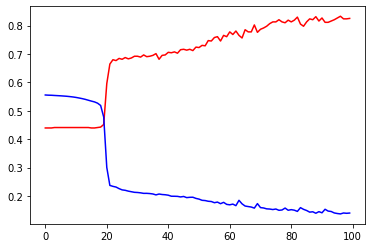

In [20]:
# 那两个“键值对”画出来：
plt.plot(history1.epoch, history1.history.get('acc'), c = 'r')
plt.plot(history1.epoch, history1.history.get('loss'), c = 'b')